In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt
%matplotlib inline
import random
from IPython import display

import tensorflow as tf
from keras import Sequential
from keras.layers import Dense
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
     

# as_frame = True to load the dataset as a Pandas dataframe
california_housing = fetch_california_housing(as_frame = True)

In [37]:
california_housing.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [38]:
california_housing.target.head()


0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [39]:

california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


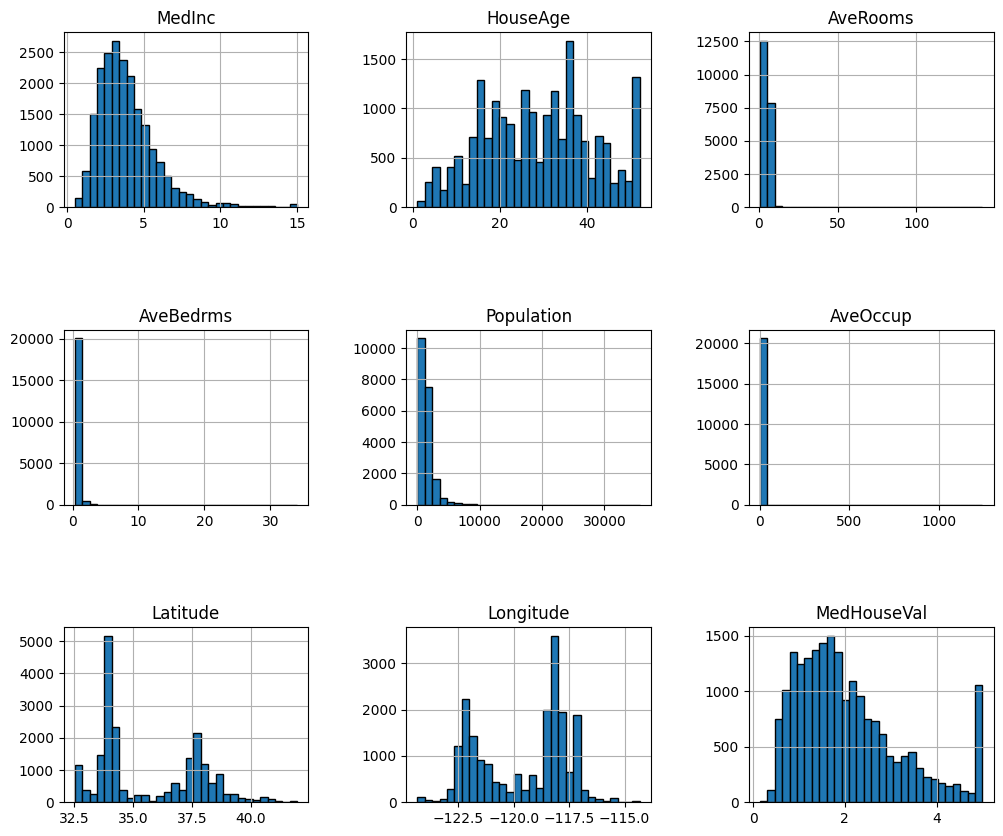

In [40]:
california_housing.frame.hist(figsize=(12,10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# We see the median income has a long tail. There are some people getting a high salary
# Average House Age, the distribution looks almost normal
# For Average Rooms, Average Bedrooms, Average Occupancy, the scale seems too large and the outputs are not noticeable. There could be outliers too.
 

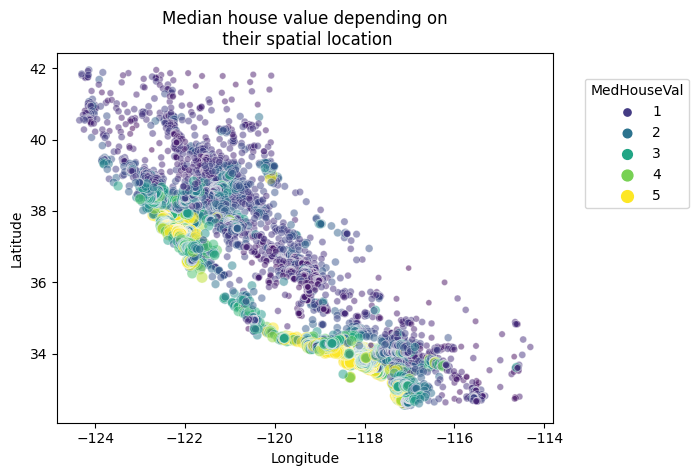

In [41]:
# We can plot X as longitude and Y as latitude to see how they are related to hopuse prices

sns.scatterplot(
    data= california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5
)
plt.legend(title="MedHouseVal",
           bbox_to_anchor=(1.05,0.95),
           loc="upper left")
_= plt.title("Median house value depending on\n their spatial location")

In [42]:
california_housing = fetch_california_housing()

# split into input and output columns
X,y = california_housing.data, california_housing.target
# Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

# check the structure
print("Training features:", X_train.shape)
print("Training labels:", X_test.shape)
print("Testing features:", y_train.shape)
print("Training labels:", y_test.shape)

Training features: (13828, 8)
Training labels: (6812, 8)
Testing features: (13828,)
Training labels: (6812,)


In [43]:
n_features = X_train.shape[1]
print(n_features)

8


In [44]:
#model def
model = Sequential()
model.add(Dense(8, activation='relu', kernel_initializer="he_normal", input_shape=(n_features,)))
model.add(Dense(4, activation='relu', kernel_initializer="he_normal"))
model.add(Dense(1))

In [45]:
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optim, loss='mse')

In [46]:
history = model.fit(X_train, y_train, epochs=150, batch_size=164, verbose=2)


Epoch 1/150


85/85 - 0s - loss: 45.9462 - 450ms/epoch - 5ms/step
Epoch 2/150
85/85 - 0s - loss: 9.7710 - 74ms/epoch - 873us/step
Epoch 3/150
85/85 - 0s - loss: 6.6017 - 75ms/epoch - 878us/step
Epoch 4/150
85/85 - 0s - loss: 4.8367 - 66ms/epoch - 781us/step
Epoch 5/150
85/85 - 0s - loss: 3.7373 - 140ms/epoch - 2ms/step
Epoch 6/150
85/85 - 0s - loss: 2.9622 - 85ms/epoch - 1ms/step
Epoch 7/150
85/85 - 0s - loss: 2.4249 - 72ms/epoch - 850us/step
Epoch 8/150
85/85 - 0s - loss: 2.0831 - 72ms/epoch - 843us/step
Epoch 9/150
85/85 - 0s - loss: 1.8799 - 87ms/epoch - 1ms/step
Epoch 10/150
85/85 - 0s - loss: 1.6684 - 75ms/epoch - 881us/step
Epoch 11/150
85/85 - 0s - loss: 1.5688 - 73ms/epoch - 854us/step
Epoch 12/150
85/85 - 0s - loss: 1.4467 - 67ms/epoch - 785us/step
Epoch 13/150
85/85 - 0s - loss: 1.3679 - 48ms/epoch - 568us/step
Epoch 14/150
85/85 - 0s - loss: 1.3200 - 66ms/epoch - 777us/step
Epoch 15/150
85/85 - 0s - loss: 1.2419 - 64ms/epoch - 753us/step
Epoch 16/150
85/85 - 0s - loss: 1.1916 - 85ms/epoch

In [47]:
# Evaluate model
error = model.evaluate(X_test, y_test, verbose=0)
print(f"MSE: {error}, RMSE: {sqrt(error)}")
     

MSE: 0.6141247749328613, RMSE: 0.7836611352701252


In [48]:
# Let's make a function that randomly chooses the row, and makes predictions
def random_housing_predictor():
  num = random.randint(0, 20640)
  row_chosen = [feature for feature in california_housing.data[num]]
  true_output = california_housing.target[num]
  y_hat = model.predict([row_chosen])
  print(f"True output: {true_output},\n Predicted Output: {y_hat}")

In [49]:
random_housing_predictor()

1/1 [==============================] - 0s 64ms/step
True output: 2.195,
 Predicted Output: [[2.6756618]]


In [50]:
model.summary()
# There are three layers. First is the input layer, followed by input, and the last is output layer with node 1
   

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 4)                 36        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113
Trainable params: 113
Non-trainable params: 0
_________________________________________________________________
